In [ ]:
# Steps are:
# Gathering Data
# Exploratory Data Analysis
# Data Visualizations
# Model Implementation.
# ML Model Selecting and Model PredPrediction
# HyperTunning the ML Model
# Deploy Model


In [ ]:
# Attribute Information:
# ID number
# Diagnosis (M = malignant, B = benign)
# Ten real-valued features are computed for each cell nucleus:

# radius (mean of distances from center to points on the perimeter)
# texture (standard deviation of gray-scale values)
# perimeter
# area
# smoothness (local variation in radius lengths)
# compactness (perimeter^2 / area - 1.0)
# concavity (severity of concave portions of the contour)
# concave points (number of concave portions of the contour)
# symmetry
# fractal dimension ("coastline approximation" - 1)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.options.display.max_columns = 100

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# Data collection
data = pd.read_csv('/Users/nirmalkoirala/Desktop/project/data.csv' )

In [4]:
# cell 1
len(data.index), len(data.columns)

(569, 33)

In [5]:
# cell2
data.shape

(569, 33)

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
# Exploring Data Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
data.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [10]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [11]:
data.isna().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
data = data.dropna(axis='columns')

In [13]:
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


In [14]:
# Identify dependent and independent
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [15]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [16]:
data.head(2)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [17]:
diagnosis_unique = data.diagnosis.unique()


In [18]:
diagnosis_unique


array(['M', 'B'], dtype=object)

In [19]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

/Users/nirmalkoirala/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


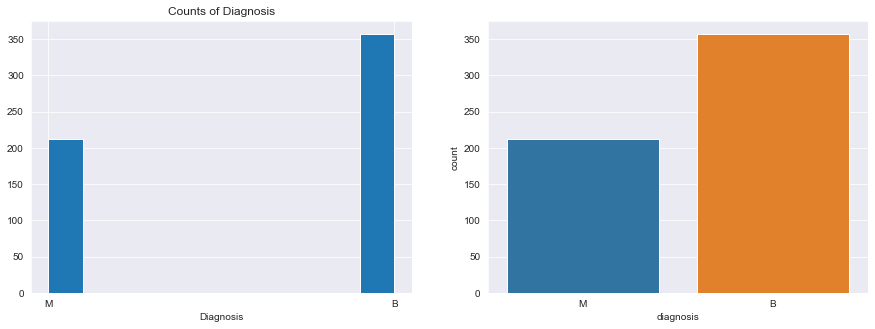

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist( data.diagnosis)
# plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")


plt.subplot(1, 2, 2)

sns.countplot('diagnosis', data=data); # ";" to remove output like this > <matplotlib.axes._subplots.AxesSubplot at 0x7f3a1dddba50>

# plt.show() 

In [21]:
from matplotlib import pyplot as plt

In [22]:
# # plt.figure(figsize=(7,12))
# plt.histogram(data, x='diagnosis')
# plt.show()


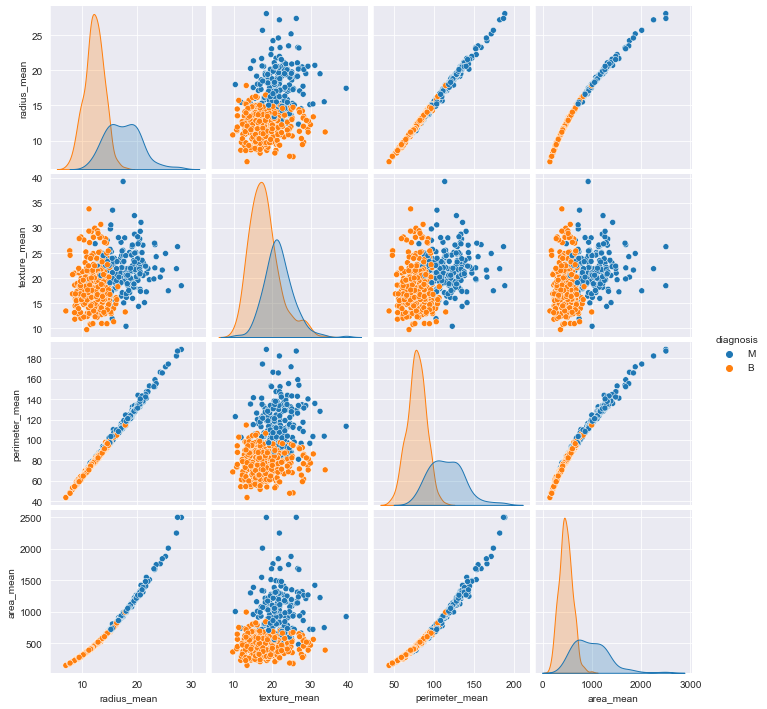

In [23]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

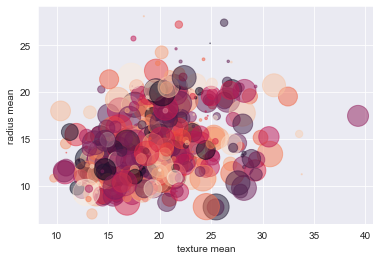

In [24]:
size = len(data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.5);

In [25]:
# Data Filtering¶
# Now, we have one categorical feature, so we need to convert it into numeric values using LabelEncoder from sklearn.preprocessing packages
from sklearn.preprocessing import LabelEncoder

In [26]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [27]:
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

In [28]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [29]:
print(data.diagnosis.value_counts())
print("\n", data.diagnosis.value_counts().sum())

0    357
1    212
Name: diagnosis, dtype: int64

 569


In [30]:
# Find the correlation between other features, mean features only
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
data[cols].corr()

11


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


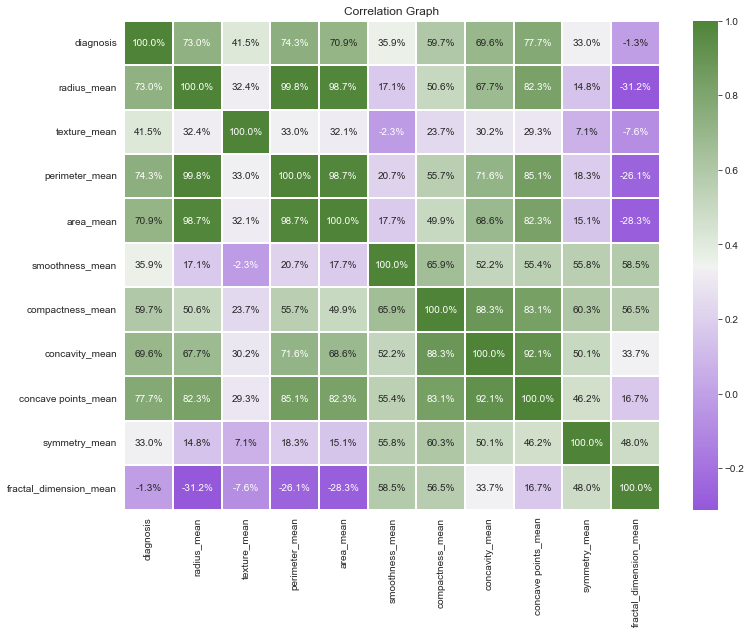

In [31]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

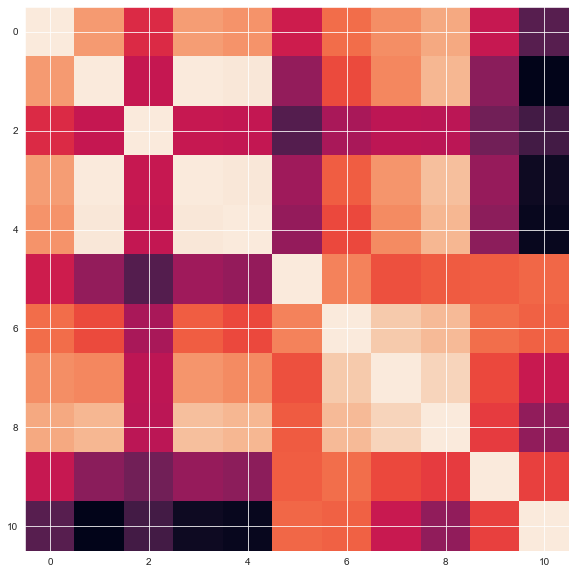

In [32]:
plt.figure(figsize=(15, 10))


fig = plt.imshow(data[cols].corr());
plt.show()

In [33]:
# Model Implementation
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

In [36]:
# Feature Selection
# Select feature for predictions
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [37]:
# Take the dependent and independent feature for prediction
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

targeted_feature = 'diagnosis'

len(prediction_feature)

6

In [38]:
X = data[prediction_feature]
X


,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [39]:
y = data.diagnosis
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [40]:
# Splite the dataset into TrainingSet and TestingSet by 33% and set the 15 fixed records
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)
# print(X_test)

     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
274        17.93          115.20      998.9         0.1538           0.07027   
189        12.30           78.83      463.7         0.1667           0.07253   
158        12.06           76.84      448.6         0.1590           0.05241   
257        15.32          103.20      713.3         0.2398           0.22840   
486        14.64           94.21      666.0         0.1409           0.06698   
..           ...             ...        ...            ...               ...   
85         18.46          121.10     1075.0         0.2132           0.10530   
199        14.45           94.49      642.7         0.1950           0.12060   
156        17.68          117.40      963.7         0.1971           0.16650   
384        13.28           85.79      541.8         0.1617           0.08575   
456        11.63           74.87      415.1         0.1799           0.08574   

     concave points_mean  
274         

In [41]:
# Scale the data to keep all the values in the same magnitude of 0 -1 

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [42]:

# ML Model Selecting and Model PredPrediction¶
# Model Building
# Now, we are ready to build our model for prediction, for the I made function for model building and preforming prediction and measure it's prediction and accuracy score.

# Arguments
# model => ML Model Object
# Feature Training Set data
# Feature Testing Set data
# Targetd Training Set data
# Targetd Testing Set data

In [43]:
def model_building(model, X_train, X_test, y_train, y_test):
    """
    
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)    


In [44]:
# Let's make a dictionary for multiple models for bulk predictions
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}

# print(models_list)

In [45]:
print(list(models_list.keys()))
print(list(models_list.values()))

# print(zip(list(models_list.keys()), list(models_list.values())))


['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


In [46]:
# Model Implementing
# Now, Train the model one by one and show the classification report of perticular models wise.

In [47]:
# Let's Define the function for confision metric Graphs

def cm_metrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [48]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.93      0.88      0.90        73

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy            

In [49]:
print(len(confusion_matrixs))

4


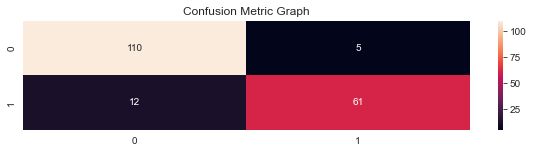

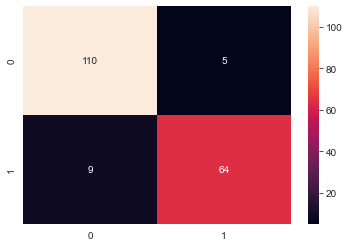

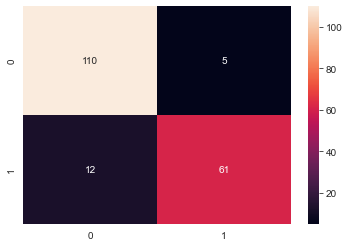

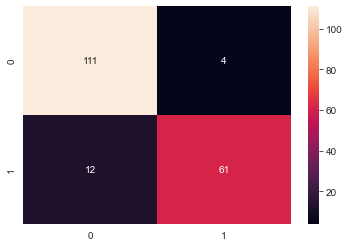

<Figure size 432x288 with 0 Axes>

In [50]:
plt.figure(figsize=(10, 2))
plt.title("Confusion Metric Graph")


for index, cm in enumerate(confusion_matrixs):

   
    plt.xlabel("Negative Positive")
    plt.ylabel("True Positive")

    
    
    # Show The Metrics Graph    
    cm_metrix_graph(cm) # Call the Confusion Metrics Graph
    plt.tight_layout(pad=True)

In [51]:
df_pred


,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.916010,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
3,SVC,0.923885,0.914894,91.49%


In [52]:
df_pred.sort_values('score', ascending=False)
# df_pred.sort_values('accuracy_score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
3,SVC,0.923885,0.914894,91.49%
0,LogisticRegression,0.916010,0.909574,90.96%


In [53]:
len(data)
# print(len(X))

569

In [54]:
# Sample For testing only

cv_score = cross_validate(LogisticRegression(), X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

pd.DataFrame(cv_score).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.017999,0.007058,0.010238,0.014981,0.019724,0.021879,0.024035
score_time,3.0,0.002289,0.000363,0.001893,0.002131,0.002370,0.002487,0.002605
test_r2,3.0,0.534312,0.186125,0.325364,0.460291,0.595218,0.638786,0.682353
train_r2,3.0,0.545196,0.051555,0.514363,0.515437,0.516511,0.560613,0.604714
test_neg_mean_squared_error,3.0,-0.108902,0.043669,-0.157895,-0.126316,-0.094737,-0.084405,-0.074074
train_neg_mean_squared_error,3.0,-0.106321,0.012102,-0.113456,-0.113307,-0.113158,-0.102753,-0.092348


In [55]:
def cross_val_scorring(model):
    
#     (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    model.fit(data[prediction_feature], data[targeted_feature])
    
    # score = model.score(X_train, y_train)    
    
    predictions = model.predict(data[prediction_feature])    
    accuracy = accuracy_score(predictions, data[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")
    
    
    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds
    
    err = []
    
    for train_index, test_index in kFold.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # Data Spliting via fold indexes
        X_train = data[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = data[targeted_feature].iloc[train_index] # all targeted features trains
        
        X_test = data[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = data[targeted_feature].iloc[test_index] # all targeted tests
        
        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))
        
        print("Score:", round(np.mean(err),  2) )

In [56]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scorring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.91
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 1.0
Cross Validation Score of'RandomForestClassifier '

Score: 0.99
Score: 0.99
Score: 0.99
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88


In [57]:
from  sklearn.model_selection import GridSearchCV

In [58]:
# Let's Implement Grid Search Algorithm

# Pick the model
model = DecisionTreeClassifier()

# Tunning Params
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, y_train) # Model Fitting

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9315789473684211

 Best Estinator is 
DecisionTreeClassifier(max_features='auto', min_samples_leaf=5,
                       min_samples_split=4)

 Best Parametes are
{'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 4}


# Observation¶
# Using this Algorithm, we can see that

# The best score is increases
# know the best estimator parametes for final model
# get the best parametes for it.

In [59]:
# Pick the model
model = KNeighborsClassifier()


# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9159244264507423

 Best Estinator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=10)

 Best Parametes are
{'leaf_size': 1, 'n_neighbors': 10, 'weights': 'uniform'}


# Observation
# Using this Algorithm, we can see that

# A little score improved compared to previous model
# Showing the Best Estimator Parametes for final model
# We can see the Best Parametes for KNN Model.


In [60]:
# Finally, Implement same strategy for SVM
# Pick the model
model = SVC()


# Tunning Params
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              }
]


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9184885290148447

 Best Estinator is 
SVC(C=10, gamma=0.001)

 Best Parametes are
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


# Observation
# Using this Algorithm, we can see that

# It's gives slight better score
# Showing the Best Estimator Parametes for final model

In [61]:
# Pick the model
model = RandomForestClassifier()


# Tunning Params
random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

# Implement GridSearchCV
gsc = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9132253711201079

 Best Estinator is 
RandomForestClassifier(max_depth=40, max_features='sqrt', n_estimators=400)

 Best Parametes are
{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


# Observation
# Using this Algorithm, we can see that

# It's gives slight better score
# Showing the Best Estimator Parametes for final model

Deploy Model
Finally, we are done so far. The last step is to deploy our model in production map. So we need to export our model and bind with web application API.
Using pickle we can export our model and store in to model.pkl file, so we can ealy access this file and calculate customize prediction using Web App API.

A little bit information about pickle:
Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions# 

In [62]:


import pickle

In [63]:
import pickle as pkl

In [64]:
model.fit(X_train, y_train)
# model = KNeighborsClassifier()
model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9148936170212766


In [65]:
import pickle as pkl

In [66]:
# Trainned Model # You can also use your own trainned model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary

In [67]:
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, y_test)

##### In this kernal, We had seen the data clearning and EDA using pandas methods and show some visual graphs to know the behaviour of this dataset and finnaly we train some model for it and calculate the prediction and it's acciracy scores and hyper tunning.

In [89]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [90]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [91]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [92]:
cancer['feature_names']


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [124]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [125]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [126]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [93]:
df = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns = np.append(cancer['feature_names'],['target']))
df.sample(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
26,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.087830,0.2252,0.06924,0.2545,0.9832,2.110,21.05,0.004452,0.03055,0.02681,0.013520,0.01454,0.003711,17.62,33.21,122.40,896.9,0.15250,0.6643,0.55390,0.27010,0.4264,0.12750,0.0
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.11660,0.1922,0.32150,0.16280,0.2572,0.06637,0.0
89,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.070640,0.2116,0.06346,0.5115,0.7372,3.814,42.76,0.005508,0.04412,0.04436,0.016230,0.02427,0.004841,16.34,18.24,109.40,803.6,0.12770,0.3089,0.26040,0.13970,0.3151,0.08473,1.0
84,12.000,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.018630,0.2079,0.05968,0.2271,1.2550,1.441,16.16,0.005969,0.01812,0.02007,0.007027,0.01972,0.002607,13.67,24.90,87.78,567.9,0.13770,0.2003,0.22670,0.07632,0.3379,0.07924,1.0
150,13.000,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.026450,0.2540,0.06087,0.4202,1.3220,2.873,34.78,0.007017,0.01142,0.01949,0.011530,0.02951,0.001533,14.16,24.11,90.82,616.7,0.12970,0.1105,0.08112,0.06296,0.3196,0.06435,1.0
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,0.3416,1.3120,2.275,20.98,0.010980,0.01257,0.01031,0.003934,0.02693,0.002979,11.15,24.62,71.11,380.2,0.13880,0.1255,0.06409,0.02500,0.3057,0.07875,1.0
402,12.960,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.018830,0.1874,0.05899,0.2357,1.2990,2.397,20.21,0.003629,0.03713,0.03452,0.010650,0.02632,0.003705,14.13,24.61,96.31,621.9,0.09329,0.2318,0.16040,0.06608,0.3207,0.07247,1.0
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.020310,0.1872,0.05669,0.1705,0.5066,1.372,14.00,0.004230,0.01587,0.01169,0.006335,0.01943,0.002177,14.84,20.21,99.16,670.6,0.11050,0.2096,0.13460,0.06987,0.3323,0.07701,1.0
156,17.680,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.105400,0.1971,0.06166,0.8113,1.4000,5.540,93.91,0.009037,0.04954,0.05206,0.018410,0.01778,0.004968,20.47,25.11,132.90,1302.0,0.14180,0.3498,0.35830,0.15150,0.2463,0.07738,0.0
406,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.045280,0.1735,0.05875,0.2387,0.6372,1.729,21.83,0.003958,0.01246,0.01831,0.008747,0.01500,0.001621,17.71,19.58,115.90,947.9,0.12060,0.1722,0.23100,0.11290,0.2778,0.07012,1.0


In [127]:
df.isnull().sum().sum()

0

In [128]:
print(df.shape)

(569, 31)


In [129]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

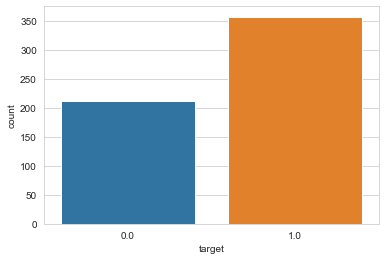

In [130]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)


<AxesSubplot:>

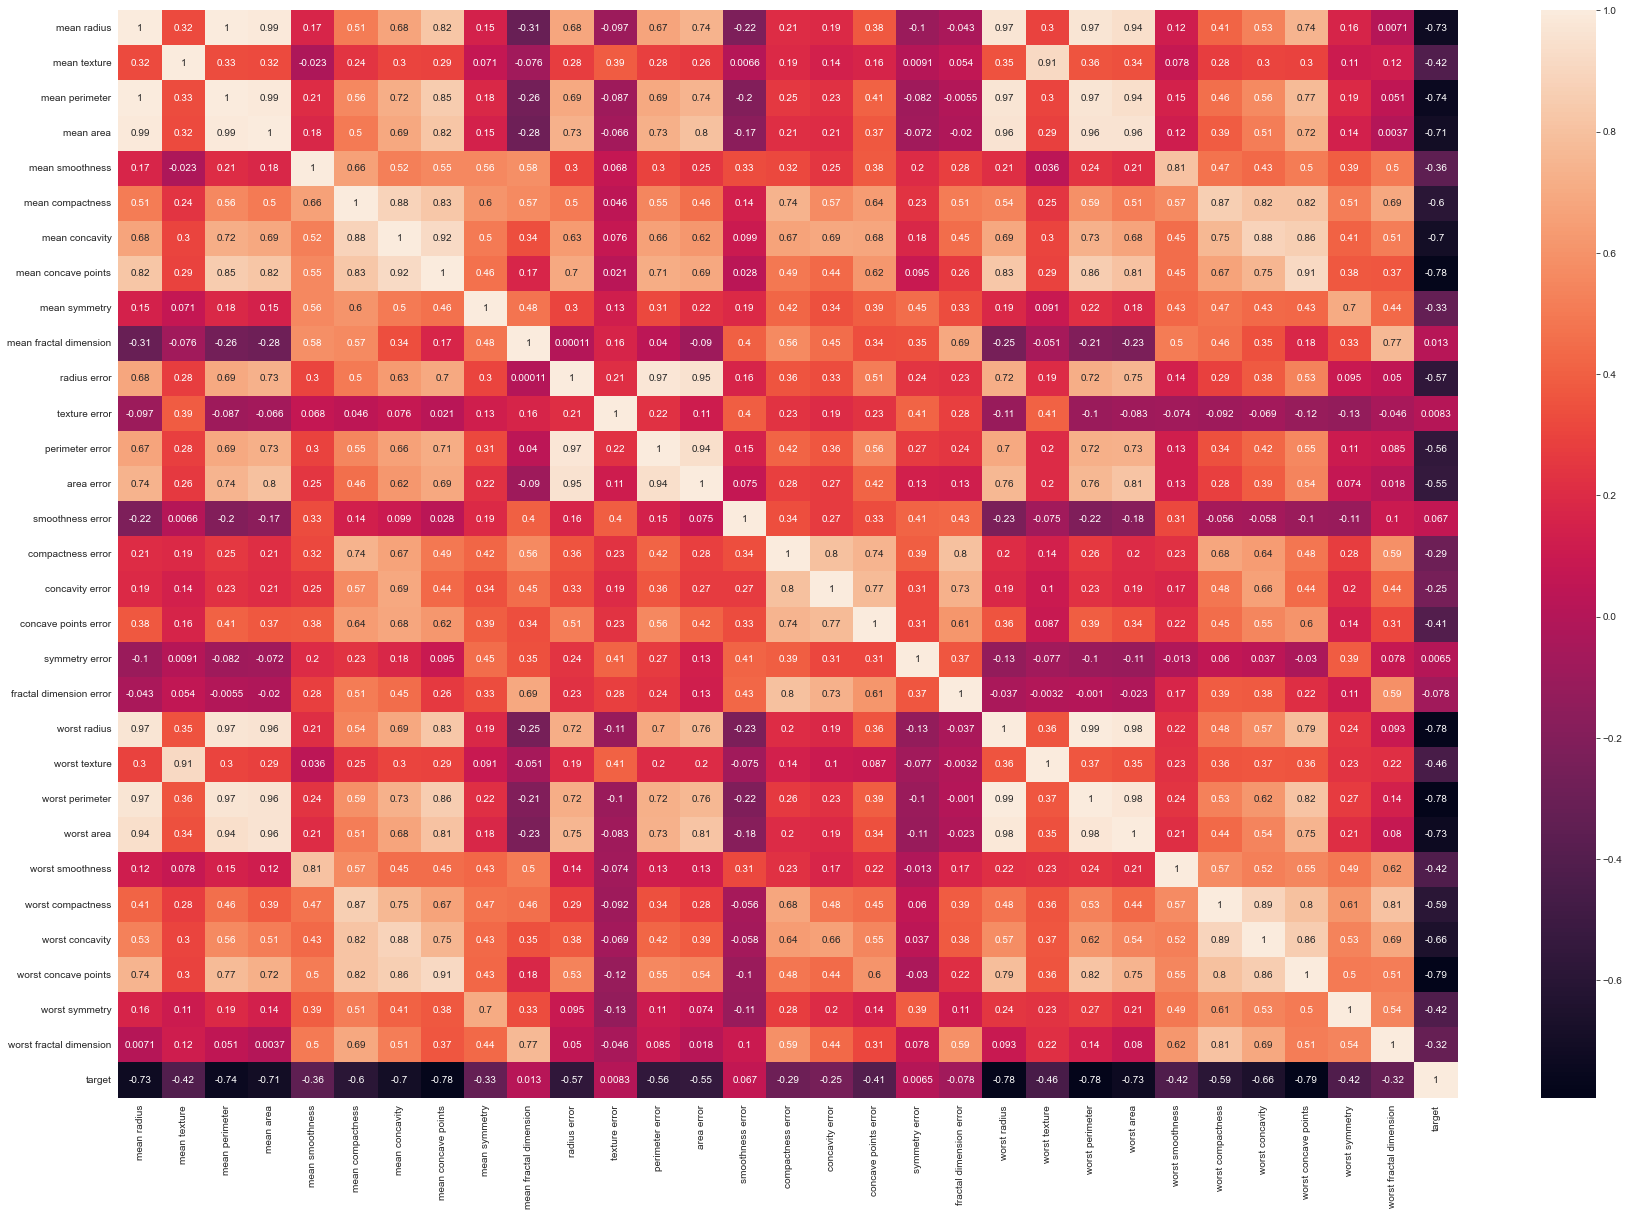

In [131]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

/Users/nirmalkoirala/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


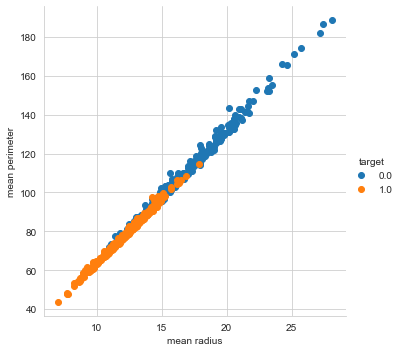

In [132]:
sns.FacetGrid(df,hue="target",size=5).map(plt.scatter,"mean radius","mean perimeter").add_legend();
plt.show()

In [133]:

def drop_features(feature_name):
  df.drop([feature_name], axis = 1,inplace=True)

list_of_features_to_be_dropped = ['mean radius','mean perimeter','mean area','worst area',
'worst perimeter','texture error','mean fractal dimension','smoothness error','fractal dimension error','symmetry error','perimeter error','worst fractal dimension','compactness error', 'concavity error','mean texture', 'mean smoothness','area error']

for i in list_of_features_to_be_dropped:
  drop_features(i)

<AxesSubplot:>

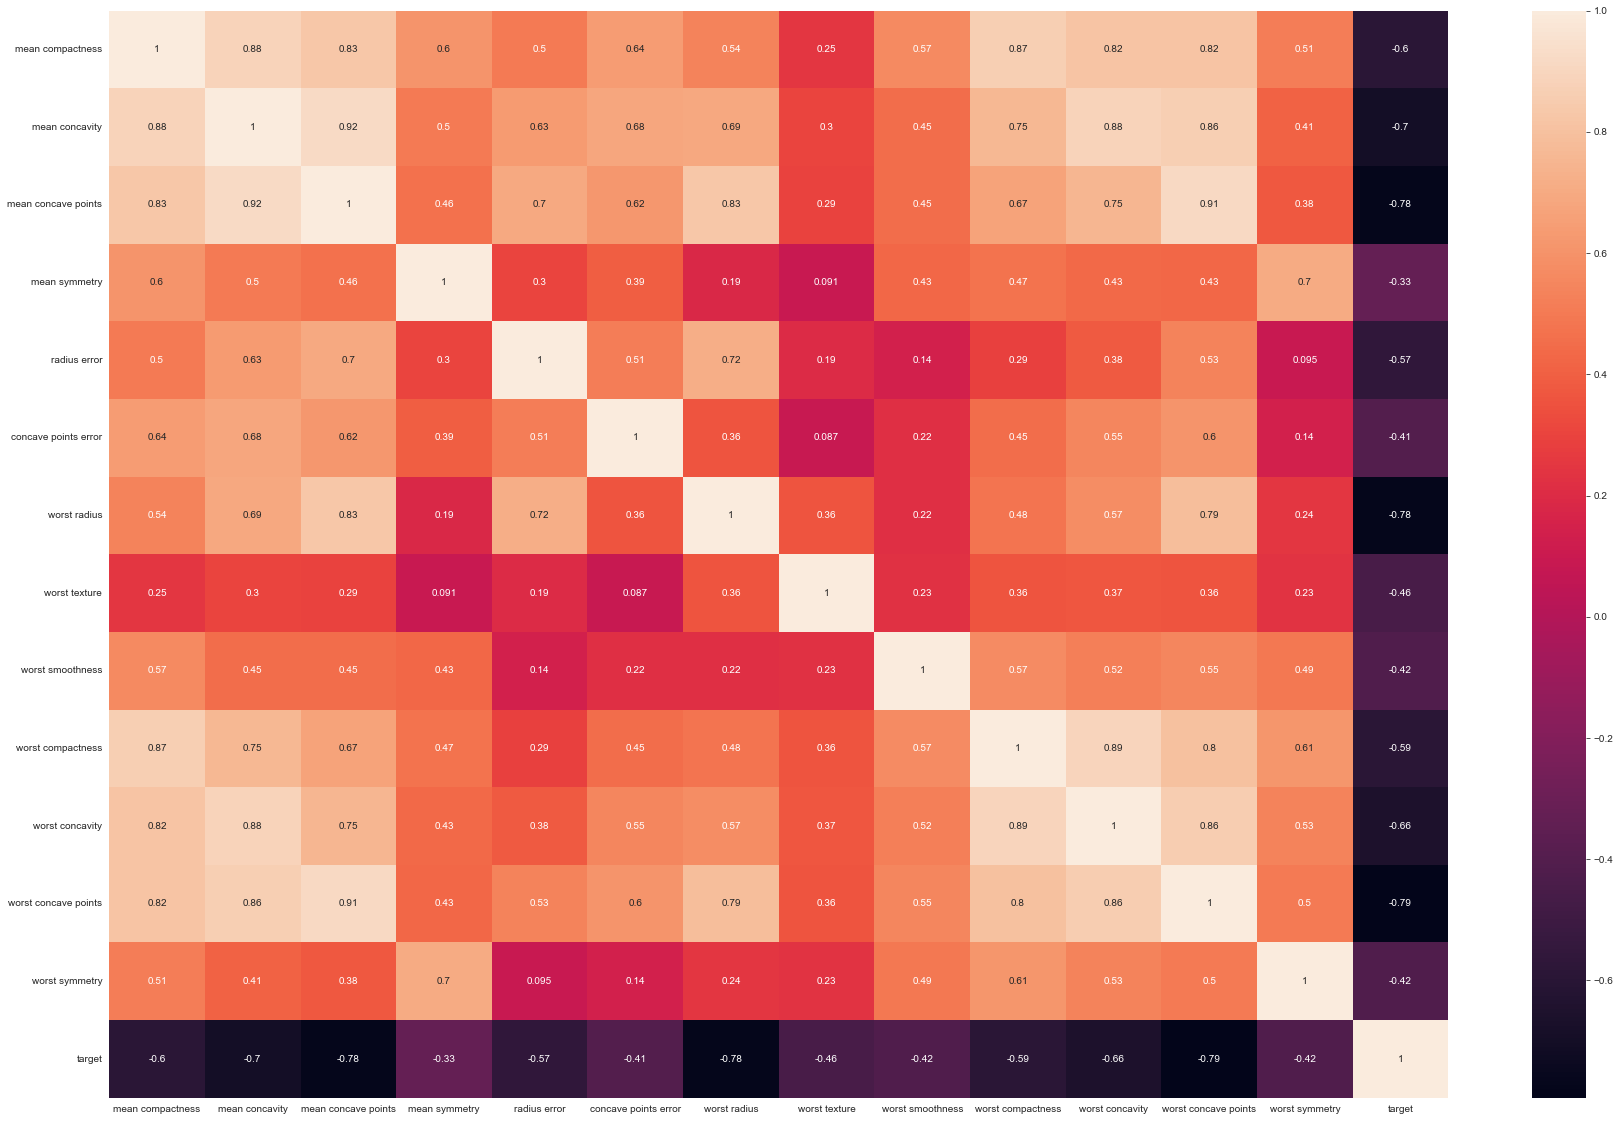

In [134]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

In [135]:
df.shape

(569, 14)

In [136]:
df.columns

Index(['mean compactness', 'mean concavity', 'mean concave points',
       'mean symmetry', 'radius error', 'concave points error', 'worst radius',
       'worst texture', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry', 'target'],
      dtype='object')

In [137]:
df.sample(10)

,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,concave points error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,target
279,0.07688,0.04479,0.037110,0.2110,0.2479,0.010430,14.980,21.74,0.1185,0.1724,0.1456,0.09993,0.2955,1.0
474,0.10690,0.05115,0.015710,0.1861,0.1482,0.006691,11.940,19.35,0.1332,0.3898,0.3365,0.07966,0.2581,1.0
80,0.09362,0.04591,0.022330,0.1842,0.3251,0.007506,13.110,32.16,0.1557,0.1676,0.1755,0.06127,0.2762,1.0
46,0.05943,0.01588,0.005917,0.1769,0.1563,0.005917,8.964,21.96,0.1297,0.1357,0.0688,0.02564,0.3105,1.0
461,0.19880,0.36350,0.168900,0.2061,2.5470,0.025980,36.040,31.37,0.1357,0.4256,0.6833,0.26250,0.2641,0.0
108,0.27680,0.42640,0.182300,0.2556,1.2150,0.024800,28.400,28.01,0.1701,0.6997,0.9608,0.29100,0.4055,0.0
380,0.11110,0.07900,0.055500,0.2018,0.2562,0.011640,12.840,20.53,0.1610,0.2429,0.2247,0.13180,0.3343,1.0
265,0.11430,0.13670,0.086460,0.1769,1.1720,0.009280,32.490,47.16,0.1401,0.2644,0.3442,0.16590,0.2868,0.0
261,0.06290,0.02891,0.028370,0.1564,0.4007,0.007671,19.850,31.47,0.1240,0.1486,0.1211,0.08235,0.2452,0.0
211,0.06900,0.02669,0.013930,0.1533,0.2222,0.006747,13.300,24.99,0.1280,0.1880,0.1471,0.06913,0.2535,1.0


In [138]:
X = df.drop('target',axis=1)
y = df['target']

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=94)

In [141]:
print(X_train.shape,X_test.shape,)
print(y_train.shape,y_test.shape)

(426, 13) (143, 13)
(426,) (143,)


In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [144]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [145]:
predict = KNN.predict(X_test)

In [146]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print('Confusion Matrix')
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))

Confusion Matrix
[[52  1]
 [ 3 87]]
0.972027972027972


In [147]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        53
         1.0       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [148]:
# Here we will check Error for k value in range of 1 to 40
accuracy= []

for i in range(1,24):
    KNN = KNeighborsClassifier(n_neighbors= i)
    KNN.fit(X_train, y_train)
    pred_i = KNN.predict(X_test)
    error=np.mean(pred_i == y_test)
    accuracy.append(error)

Text(0, 0.5, 'accuracy')

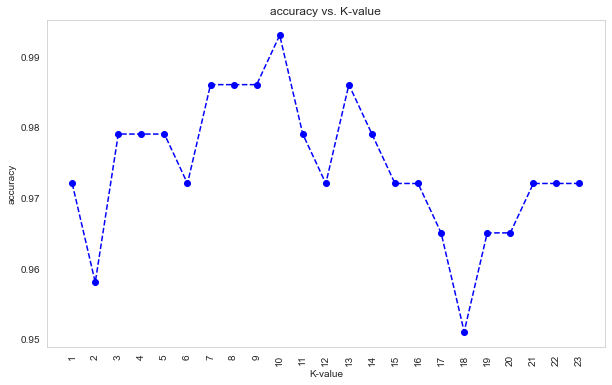

In [149]:
# Plot of accuracy vs K-value
plt.figure(figsize=(10,6))
plt.plot(range(1,24), accuracy,color = 'blue',linestyle='dashed', marker='o')
plt.title("accuracy vs. K-value")
plt.xticks(list(range(1,24)),rotation=90)
plt.grid()

plt.xlabel('K-value')
plt.ylabel('accuracy')

In [150]:
KNN = KNeighborsClassifier(n_neighbors= 10)
KNN.fit(X_train, y_train)
pred = KNN.predict(X_test)

print('WITH K=10')
print()
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))
print()
print(f"Accuracy score is {(accuracy_score(y_test,pred))*100} %")

WITH K=10

[[52  1]
 [ 0 90]]

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        53
         1.0       0.99      1.00      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


Accuracy score is 99.3006993006993 %


In [ ]:
features = ['mean compactness', 'mean concavity', 'mean concave points',
        'mean symmetry', 'radius error'
        , 'concave points error',
        'worst radius', 'worst texture', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst sfeymmetry']
d = []
for i in features:
  a = float(input(f"Enter the {i} :"))
  d.append(a)
print()
array = np.array(d)
array_2d = np.reshape(array, (-1, 13))
pred = KNN.predict(array_2d)
pred = int(pred[0])
if(pred == 0):
  print("RESULT:- \nTumor is benign or non cancerous.")
  print("A non-cancerous (benign) soft tissue tumour is a growth that does not spread (metastasize) to other parts of the body. Non-cancerous tumours are not usually life-threatening. ")
else:
  print("RESULT:- \nTumor is malignant or cancerous.")
  print("Please consult a doctor.")

Enter the mean compactness :10


# 